In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings("ignore")
%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-data-analysis/Students data.csv


In [2]:
data = pd.read_csv('../input/students-data-analysis/Students data.csv')
data.set_index('ID', inplace = True)
data.head()

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 1141 to 1245
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                105 non-null    object 
 1   gender               105 non-null    object 
 2   race                 105 non-null    int64  
 3   GPA                  105 non-null    float64
 4   Algebra              105 non-null    int64  
 5   Calculus1            105 non-null    int64  
 6   Calculus2            105 non-null    int64  
 7   Statistics           105 non-null    int64  
 8   Probability          105 non-null    int64  
 9   Measure              105 non-null    int64  
 10  Functional_analysis  105 non-null    int64  
 11  from1                105 non-null    object 
 12  from2                105 non-null    object 
 13  from3                105 non-null    object 
 14  from4                105 non-null    int64  
 15  y                    105 non-null   

##### rename columns
'from1' to 'home_location' - students' home locations<br>
'from2' to 'fref_on_nath - a probably bad indicator for preference on mathematics<br>
'from 3' to 'how_apply' - how did students apply for this university (undergraduate)<br>
'from4' to 'wealth_level' - a probably bad indicator for family background. 0 with more wealth, 4 with more poverty<br>
'y' to 'result' - final indicator, where:  0 - one fails to apply for the graduate school, who may apply again or search jobs in the future; 1 - success, inland; 2 - success, abroad.

In [4]:
data.rename(columns={'from1':'home_location', 'from2': 'pref_on_math', 'from3': 'how_apply', 'from4': 'wealth_level', 
                     'y':'result'}, inplace = True)
data

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,home_location,pref_on_math,how_apply,wealth_level,result
ID,,,,,,,,,,,,,,,,
1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2


In [5]:
data.dtypes.value_counts()

int64      10
object      5
float64     1
dtype: int64

In [6]:
data.isnull().value_counts()

class  gender  race   GPA    Algebra  Calculus1  Calculus2  Statistics  Probability  Measure  Functional_analysis  home_location  pref_on_math  how_apply  wealth_level  result
False  False   False  False  False    False      False      False       False        False    False                False          False         False      False         False     105
dtype: int64

In [7]:
data.describe()

,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,wealth_level,result
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,1.790476,82.957048,76.057143,71.961905,78.942857,85.133333,83.876190,80.761905,75.323810,0.504762,0.714286
std,1.673867,6.053187,11.722618,12.197039,14.997326,10.269509,10.514363,10.296119,13.003324,0.889293,0.828742
min,1.000000,63.490000,46.000000,38.000000,17.000000,51.000000,29.000000,54.000000,9.000000,0.000000,0.000000
25%,1.000000,79.340000,67.000000,64.000000,71.000000,80.000000,79.000000,74.000000,67.000000,0.000000,0.000000
50%,1.000000,84.110000,76.000000,73.000000,83.000000,87.000000,85.000000,81.000000,76.000000,0.000000,0.000000
75%,1.000000,87.300000,84.000000,80.000000,91.000000,92.000000,92.000000,89.000000,85.000000,0.000000,1.000000
max,7.000000,93.710000,98.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,3.000000,2.000000


In [8]:
data['class'].value_counts()

A    76
B    29
Name: class, dtype: int64

In [9]:
data['race'].value_counts()

1    81
3     6
7     5
4     4
5     4
2     3
6     2
Name: race, dtype: int64

In [10]:
data['gender'].value_counts()

female    68
male      37
Name: gender, dtype: int64

In [11]:
data['home_location'].value_counts()

B     9
E     9
P     8
X     7
K     6
M     5
N     5
A     4
F     4
U     4
H     4
S     4
J     4
T     3
O     3
I     3
C     3
Q     2
R     2
G     2
V     2
D     2
Z     2
W     2
Y     2
AA    2
L     1
AB    1
Name: home_location, dtype: int64

In [12]:
data['pref_on_math'].value_counts()

B    73
A    32
Name: pref_on_math, dtype: int64

In [13]:
data['how_apply'].value_counts()

A    81
D    10
S     6
C     4
B     4
Name: how_apply, dtype: int64

In [14]:
data['wealth_level'].value_counts()
#possibly "3" is abnormal values

0    79
2    25
3     1
Name: wealth_level, dtype: int64

## Indentify abnormal value
1. Boxplot analysis
2. Scatter diagram analysis

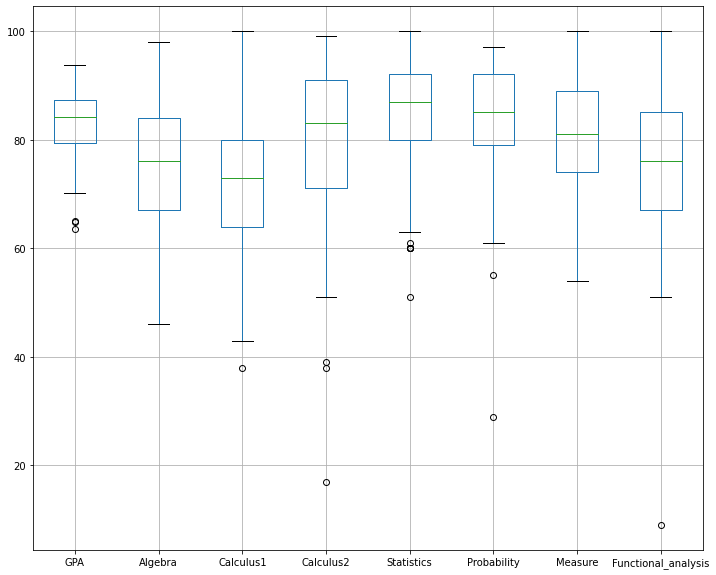

In [15]:
data[['GPA', 'Algebra', 'Calculus1', 'Calculus2','Statistics', 'Probability', 'Measure', 'Functional_analysis']].boxplot(figsize=(12, 10));

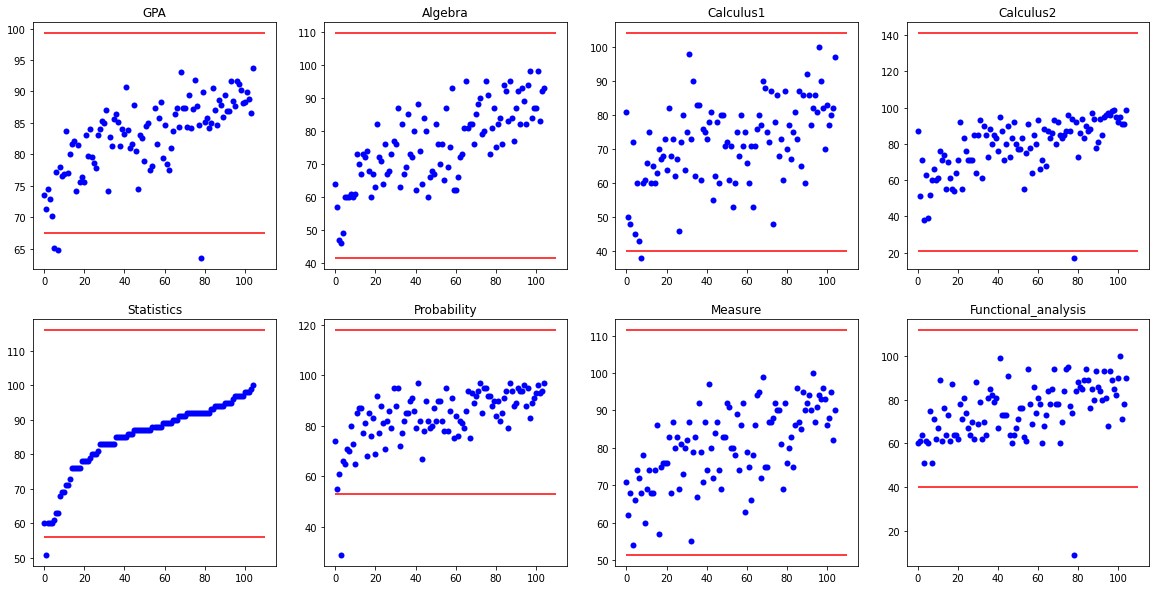

In [16]:
#k from 1.5 to 3
def intervals_for_outliers(data, column, k):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    a = Q1 - k * (Q3 - Q1)
    b =  Q3 + k * (Q3 - Q1)
    return a, b 
data_columns = {'GPA': 1.5, 'Algebra':1.5, 'Calculus1':1.5, 'Calculus2':2.5,'Statistics':2, 'Probability':2,
                'Measure':1.5, 'Functional_analysis':1.5}
plt.figure(figsize=(20, 10))
i = 0
for column in data_columns.keys():
    i +=1
    a, b = intervals_for_outliers(data, column, data_columns[column])
    data.loc[(data[column] >= a) & (data[column] <= b)] 
    plt.subplot(2, 4, i)
    plt.title(column)
    x = [x for x in range(0, len(data))]
    plt.scatter(x, data[column], linewidths = 0.01, color = 'blue')
    plt.hlines(a, 0, 110, color = 'red')
    plt.hlines(b, 0, 110, color = 'red')    
plt.subplots_adjust(hspace=0.2, wspace=0.2)

In [17]:
data = data.loc[((data['GPA'] > 67) & (data['Calculus1'] > 40) & (data['Calculus2'] > 30) & (data['Statistics'] > 55) & (data['Probability'] > 50) & (data['Functional_analysis'] > 40) & (data['wealth_level'] != 3))]

0    49
1    25
2    25
Name: result, dtype: int64


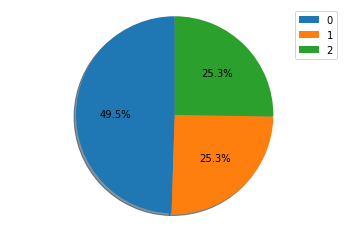

In [18]:
#are the classes in the set balanced?
print(data['result'].value_counts())
labels = dict(data['result'].value_counts()).keys()
sizes = dict(data['result'].value_counts()).values()
plt.pie(sizes,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels = labels)
plt.axis('equal');

In [19]:
data.loc[(data['gender'] == 'female'), 'gender'] = 0
data.loc[(data['gender'] == 'male'), 'gender'] = 1
data.loc[(data['pref_on_math'] == 'A'), 'pref_on_math'] = 0
data.loc[(data['pref_on_math'] == 'B'), 'pref_on_math'] = 1
data.loc[(data['class'] == 'A'), 'class'] = 0
data.loc[(data['class'] == 'B'), 'class'] = 1
how_apply = pd.get_dummies(data['how_apply'], prefix = 'apply')
data = pd.concat([data, how_apply], axis = 1)
data.drop(['home_location', 'how_apply'], axis=1, inplace=True)
data = data.astype({'class': 'int64', 'gender': 'int64', 'pref_on_math': 'int64'})
data.insert(len(data.columns)-1, 'result', data.pop('result'))
data

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,pref_on_math,wealth_level,apply_A,apply_B,apply_C,apply_D,apply_S,result
ID,,,,,,,,,,,,,,,,,,,
1143,0,0,2,74.56,47,48,71,60,61,68,64,0,0,1,0,0,0,0,1
1145,0,0,1,70.11,49,45,63,60,66,66,61,0,0,1,0,0,0,0,0
1147,0,1,4,77.11,60,43,52,63,71,72,75,0,0,1,0,0,0,0,1
1149,1,0,5,77.92,61,60,66,68,80,78,71,1,0,1,0,0,0,0,0
1150,0,0,5,76.50,60,61,60,69,73,60,62,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0,0,1,88.34,87,83,92,98,93,86,90,1,0,1,0,0,0,0,1
1242,1,1,1,89.84,98,77,95,98,96,88,100,1,0,1,0,0,0,0,1
1243,1,1,1,88.82,83,80,91,98,93,95,71,1,0,1,0,0,0,0,2


In [20]:
data_corr = data.corr()
data_corr.style.background_gradient(cmap ='coolwarm')

,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,pref_on_math,wealth_level,apply_A,apply_B,apply_C,apply_D,apply_S,result
class,1.000000,-0.044852,-0.047168,-0.076622,-0.032978,-0.145396,-0.044658,-0.093610,0.055490,-0.046494,-0.069774,0.414286,0.118913,0.008226,-0.132074,-0.092423,0.259689,-0.163487,-0.132912
gender,-0.044852,1.000000,0.121493,-0.103597,0.018574,0.159430,-0.084439,-0.010058,-0.132528,-0.077634,-0.070286,0.231813,-0.246760,-0.093029,0.283717,0.198539,-0.154715,-0.005403,0.134375
race,-0.047168,0.121493,1.000000,-0.269694,-0.261012,-0.157167,-0.216627,-0.197725,-0.306246,-0.208373,-0.130369,-0.085493,-0.127077,-0.260909,0.395198,0.190725,0.084006,-0.092778,0.019400
GPA,-0.076622,-0.103597,-0.269694,1.000000,0.818985,0.671491,0.760613,0.743446,0.806237,0.776765,0.764489,0.109347,0.051742,0.052112,-0.112499,-0.200565,-0.142374,0.293350,0.215759
Algebra,-0.032978,0.018574,-0.261012,0.818985,1.000000,0.622251,0.687574,0.732547,0.728637,0.731679,0.638344,0.286266,-0.066280,-0.004575,-0.026727,-0.154183,-0.086969,0.225590,0.210856
Calculus1,-0.145396,0.159430,-0.157167,0.671491,0.622251,1.000000,0.610198,0.562583,0.540793,0.455344,0.416616,0.303490,0.046527,-0.114504,0.133541,-0.020538,-0.120616,0.243413,0.082520
Calculus2,-0.044658,-0.084439,-0.216627,0.760613,0.687574,0.610198,1.000000,0.705334,0.648778,0.647433,0.539506,0.204697,0.072732,-0.033743,-0.042501,-0.015034,-0.132437,0.261315,0.062500
Statistics,-0.093610,-0.010058,-0.197725,0.743446,0.732547,0.562583,0.705334,1.000000,0.637564,0.610521,0.488436,0.140245,-0.021857,-0.014246,-0.075064,-0.048338,-0.051083,0.176401,0.238997
Probability,0.055490,-0.132528,-0.306246,0.806237,0.728637,0.540793,0.648778,0.637564,1.000000,0.679384,0.613518,0.200890,0.136545,-0.037659,-0.058297,-0.088309,-0.038050,0.210544,0.189905
Measure,-0.046494,-0.077634,-0.208373,0.776765,0.731679,0.455344,0.647433,0.610521,0.679384,1.000000,0.577473,0.201061,-0.016256,0.046468,-0.050149,-0.104945,-0.182539,0.243577,0.172362
